stackingのアンサンブル用シート

In [1]:
import pandas as pd


df_adachi = pd.read_csv('../data/handmade_data/block_aveprice_adachi2019.csv')
df_arakawa = pd.read_csv('../data/handmade_data/block_aveprice_arakawa2019.csv')
df_bunkyo = pd.read_csv('../data/handmade_data/block_aveprice_bunkyo2019.csv')
df_chiyoda = pd.read_csv('../data/handmade_data/block_aveprice_chiyoda2019.csv')
df_chuo = pd.read_csv('../data/handmade_data/block_aveprice_chuo2019.csv')
df_edogawa = pd.read_csv('../data/handmade_data/block_aveprice_edogawa2019.csv')
df_itabashi = pd.read_csv('../data/handmade_data/block_aveprice_itabashi2019.csv')
df_katsushika = pd.read_csv('../data/handmade_data/block_aveprice_katsushika2019.csv')
df_kita = pd.read_csv('../data/handmade_data/block_aveprice_kita2019.csv')
df_koto = pd.read_csv('../data/handmade_data/block_aveprice_koto2019.csv')
df_meguro = pd.read_csv('../data/handmade_data/block_aveprice_meguro2019.csv')
df_minato = pd.read_csv('../data/handmade_data/block_aveprice_minato2019.csv')
df_nakano = pd.read_csv('../data/handmade_data/block_aveprice_nakano2019.csv')
df_nerima = pd.read_csv('../data/handmade_data/block_aveprice_nerima2019.csv')
df_ota = pd.read_csv('../data/handmade_data/block_aveprice_ota2019.csv')
df_setagaya = pd.read_csv('../data/handmade_data/block_aveprice_setagaya2019.csv')
df_shibuya = pd.read_csv('../data/handmade_data/block_aveprice_shibuya2019.csv')
df_shinagawa = pd.read_csv('../data/handmade_data/block_aveprice_shinagawa2019.csv')
df_shinjuku = pd.read_csv('../data/handmade_data/block_aveprice_shinjuku2019.csv')
df_suginami = pd.read_csv('../data/handmade_data/block_aveprice_suginami2019.csv')
df_sumida = pd.read_csv('../data/handmade_data/block_aveprice_sumida2019.csv')
df_taito = pd.read_csv('../data/handmade_data/block_aveprice_taito2019.csv')
df_toshima = pd.read_csv('../data/handmade_data/block_aveprice_toshima2019.csv')

df_23wards = pd.concat([
    df_adachi,
    df_arakawa,
    df_bunkyo,
    df_chiyoda,
    df_chuo,
    df_edogawa,
    df_itabashi,
    df_katsushika,
    df_kita,
    df_koto,
    df_meguro,
    df_minato,
    df_nakano,
    df_nerima,
    df_ota,
    df_setagaya,
    df_shibuya,
    df_shinjuku,
    df_shinagawa,
    df_suginami,
    df_sumida,
    df_taito,
    df_toshima
],ignore_index=True)

addresses = pd.read_csv('../data/handmade_data/merge_address.csv')
addresses = addresses['所在地']
addresses = pd.DataFrame(addresses)

address_aveprice = pd.merge(addresses, df_23wards, left_on='所在地', right_on='0', how='left')
address_aveprice = address_aveprice[['所在地', '1']]
address_aveprice.columns = [['区町名', '平均地価']]

land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
land_aveprice.columns = ['平均地価']
test_land_aveprice.columns = ['平均地価']


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]]], axis=1)
y_train = rent
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D","S"]]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','S']

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


lightGBMとDARTとGOSSとXGBoostでstackingアンサンブルを行う。

In [2]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
sX_train, sX_valid, sy_train, sy_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [3]:
####LisgtGBM###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_LGBM = {
    'objective':'regression',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.430375245218262e-06,
    'max_bin': 502,
    'num_leaves': 97
}
model_LGBM = lgb.train(
                    params_LGBM,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=3000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###DART###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_DART = {
    'objective':'regression',
    'boosting_type':'dart',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 2.1600820741402023e-05,
    'max_bin': 556,
    'num_leaves': 126
}

model_DART = lgb.train(
                    params_DART,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###GOSS###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_GOSS = {
    'objective':'regression',
    'boosting_type':'goss',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.669226029558975e-07,
    'max_bin': 584,
    'num_leaves': 85
}

model_GOSS = lgb.train(
                    params_GOSS,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###XGBoost###
xgb_reg = xgboost.XGBRegressor(
    #目的関数の指定 初期値も二乗誤差です
                    objective='reg:linear',
                    #学習のラウンド数 early_stoppingを利用するので多めに指定
                    n_estimators=50000,
                    #boosterに何を用いるか 初期値もgbtreeです
                    booster='gbtree',
                    learning_rate=0.05,
                    max_depth=7,
                    random_state=0,
                    reg_alfa=2.054762512591133e-06,
                    sub_sample=0.5530198332197337,
                    colsample_bytree=0.7642417009494488,
                    min_child_weight=0.14135935551752302
)
xgb_reg.fit(sX_train, sy_train, eval_set=[(sX_valid, sy_valid)], early_stopping_rounds=10)

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'K', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' ar

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118575.175126
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 50511.5	valid_1's rmse: 47173.3
[20]	training's rmse: 36554.8	valid_1's rmse: 34357.2
[30]	training's rmse: 27718.5	valid_1's rmse: 27678.9
[40]	training's rmse: 21895.7	valid_1's rmse: 23455.8
[50]	training's rmse: 18480.9	valid_1's rmse: 21216
[60]	training's rmse: 16201.8	valid_1's rmse: 19959.1
[70]	training's rmse: 14759.3	valid_1's rmse: 19144.7
[80]	training's rmse: 13748	valid_1's rmse: 18632.3
[90]	training's rmse: 13001.9	valid_1's rmse: 18250.1
[100]	training's rmse: 12406.5	valid_1's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[20]	training's rmse: 39060.6	valid_1's rmse: 38386.1
[30]	training's rmse: 31370.9	valid_1's rmse: 32300.4
[40]	training's rmse: 28097.6	valid_1's rmse: 30064.5
[50]	training's rmse: 31488.4	valid_1's rmse: 33271.2
[60]	training's rmse: 35739.4	valid_1's rmse: 37504.2
[70]	training's rmse: 37646.7	valid_1's rmse: 39294.6
[80]	training's rmse: 32693.3	valid_1's rmse: 34700.5
[90]	training's rmse: 32554.9	valid_1's rmse: 34409.7
[100]	training's rmse: 34533.3	valid_1's rmse: 36461.8
[110]	training's rmse: 41327.6	valid_1's rmse: 42712
[120]	training's rmse: 33168.8	valid_1's rmse: 35604.5
[130]	training's rmse: 30080.5	valid_1's rmse: 32858.9
[140]	training's rmse: 32758.2	valid_1's rmse: 35347.7
[150]	training's rmse: 31275.1	valid_1's rmse: 33906.6
[160]	training's rmse: 35974.8	valid_1's rmse: 38104.3
[170]	training's rmse: 29090.7	valid_1's rmse: 32068.1
[180]	training's rmse: 27767.1	valid_1's rmse: 31113.5
[190]	training's rmse: 23772.2	valid_1's rmse: 27726.5
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:68785.59039
[16]	validation_0-rmse:66023.10751
[17]	validation_0-rmse:63305.05193
[18]	validation_0-rmse:60876.61611
[19]	validation_0-rmse:58440.02378
[20]	validation_0-rmse:56526.74184
[21]	validation_0-rmse:54541.82777
[22]	validation_0-rmse:52925.30037
[23]	validation_0-rmse:51141.56174
[24]	validation_0-rmse:49636.51780
[25]	validation_0-rmse:48034.42951
[26]	validation_0-rmse:46578.44929
[27]	validation_0-rmse:45363.79701
[28]	validation_0-rmse:44017.63525
[29]	validation_0-rmse:42952.96790
[30]	validation_0-rmse:41787.19960
[31]	validation_0-rmse:40922.97690
[32]	validation_0-rmse:40116.82153
[33]	validation_0-rmse:39010.35724
[34]	validation_0-rmse:38065.92642
[35]	validation_0-rmse:37371.72353
[36]	validation_0-rmse:36730.88944
[37]	validation_0-rmse:36004.77936
[38]	validation_0-rmse:35466.79956
[39]	validation_0-rmse:34968.01568
[40]	validation_0-rmse:34527.49734
[41]	validation_0-rmse:34083.33354
[42]	validation_0-rmse:33663.22061
[43]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7642417009494488, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
             min_child_weight=0.14135935551752302, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alfa=2.054762512591133e-06, ...)

ブレンドのモデルが重回帰分析の場合

In [31]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = LinearRegression()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

[[138580.03774219 131631.84568007 118002.78125   ]
 [121670.7329273  121447.10733973 119678.2734375 ]
 [ 81581.16831512  83961.93487889  84770.125     ]
 ...
 [177533.51012032 174722.01942288 172593.78125   ]
 [264934.83305639 258337.94436019 277411.        ]
 [ 84175.95815483  82119.23128678  82911.5       ]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


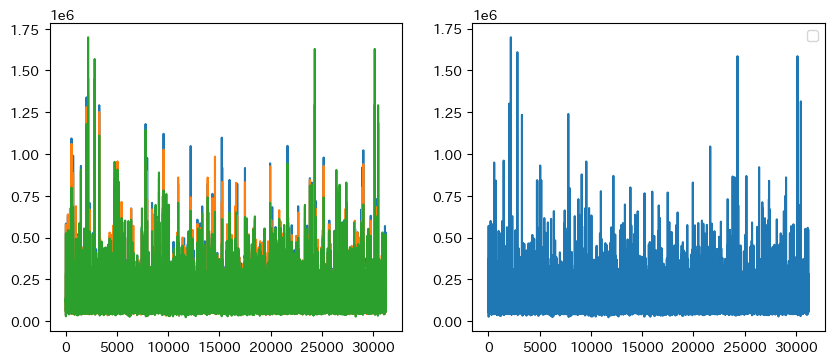

In [32]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
# ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ブレンドのモデルがLGBMの場合

In [3]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = lgb.LGBMRegressor()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

NameError: name 'model_LGBM' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


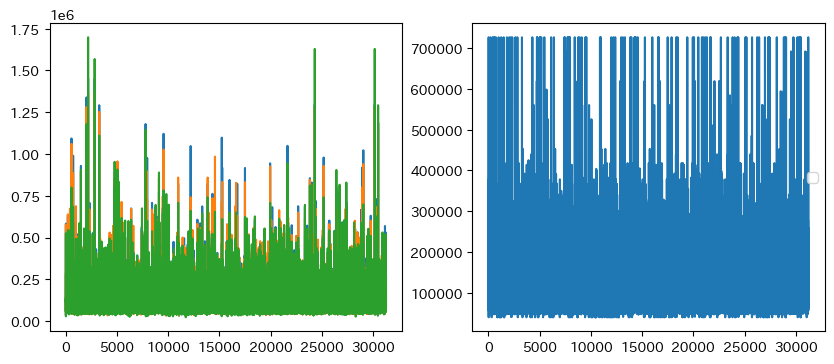

In [27]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
# ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ファイル出力

In [36]:
df = pd.read_csv('test.csv')
id = df['id']
y_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('blend_result.csv',index=False)

### GBDTとDARTとGOSSとXGBoostでstackingアンサンブルを行う。(交差検証ver)

In [48]:
import pandas as pd


df_adachi = pd.read_csv('../data/handmade_data/block_aveprice_adachi2019.csv')
df_arakawa = pd.read_csv('../data/handmade_data/block_aveprice_arakawa2019.csv')
df_bunkyo = pd.read_csv('../data/handmade_data/block_aveprice_bunkyo2019.csv')
df_chiyoda = pd.read_csv('../data/handmade_data/block_aveprice_chiyoda2019.csv')
df_chuo = pd.read_csv('../data/handmade_data/block_aveprice_chuo2019.csv')
df_edogawa = pd.read_csv('../data/handmade_data/block_aveprice_edogawa2019.csv')
df_itabashi = pd.read_csv('../data/handmade_data/block_aveprice_itabashi2019.csv')
df_katsushika = pd.read_csv('../data/handmade_data/block_aveprice_katsushika2019.csv')
df_kita = pd.read_csv('../data/handmade_data/block_aveprice_kita2019.csv')
df_koto = pd.read_csv('../data/handmade_data/block_aveprice_koto2019.csv')
df_meguro = pd.read_csv('../data/handmade_data/block_aveprice_meguro2019.csv')
df_minato = pd.read_csv('../data/handmade_data/block_aveprice_minato2019.csv')
df_nakano = pd.read_csv('../data/handmade_data/block_aveprice_nakano2019.csv')
df_nerima = pd.read_csv('../data/handmade_data/block_aveprice_nerima2019.csv')
df_ota = pd.read_csv('../data/handmade_data/block_aveprice_ota2019.csv')
df_setagaya = pd.read_csv('../data/handmade_data/block_aveprice_setagaya2019.csv')
df_shibuya = pd.read_csv('../data/handmade_data/block_aveprice_shibuya2019.csv')
df_shinagawa = pd.read_csv('../data/handmade_data/block_aveprice_shinagawa2019.csv')
df_shinjuku = pd.read_csv('../data/handmade_data/block_aveprice_shinjuku2019.csv')
df_suginami = pd.read_csv('../data/handmade_data/block_aveprice_suginami2019.csv')
df_sumida = pd.read_csv('../data/handmade_data/block_aveprice_sumida2019.csv')
df_taito = pd.read_csv('../data/handmade_data/block_aveprice_taito2019.csv')
df_toshima = pd.read_csv('../data/handmade_data/block_aveprice_toshima2019.csv')

df_23wards = pd.concat([
    df_adachi,
    df_arakawa,
    df_bunkyo,
    df_chiyoda,
    df_chuo,
    df_edogawa,
    df_itabashi,
    df_katsushika,
    df_kita,
    df_koto,
    df_meguro,
    df_minato,
    df_nakano,
    df_nerima,
    df_ota,
    df_setagaya,
    df_shibuya,
    df_shinjuku,
    df_shinagawa,
    df_suginami,
    df_sumida,
    df_taito,
    df_toshima
],ignore_index=True)

addresses = pd.read_csv('../data/handmade_data/merge_address.csv')
addresses = addresses['所在地']
addresses = pd.DataFrame(addresses)

address_aveprice = pd.merge(addresses, df_23wards, left_on='所在地', right_on='0', how='left')
address_aveprice = address_aveprice[['所在地', '1']]
address_aveprice.columns = [['区町名', '平均地価']]

land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
land_aveprice.columns = ['平均地価']
test_land_aveprice.columns = ['平均地価']


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]]], axis=1)
y_train = rent
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D","S"]]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','S']

In [49]:
X_train

,築年数,面積,契約期間,定期借家,所在階,全体の階数,最寄り駅,所要時間,平均地価,所在地,部屋数,L,D,S
0,117.0,20.01,2.0,1,1.0,12.0,1,4.0,6.016250e+05,1,1,0,0,0
1,538.0,16.50,2.0,1,5.0,10.0,2,5.0,1.408000e+06,2,1,0,0,0
2,102.0,22.05,2.0,1,12.0,15.0,3,6.0,8.550000e+05,3,1,0,0,0
3,352.0,60.48,2.0,2,3.0,4.0,4,9.0,6.988750e+05,4,2,1,1,0
4,379.0,39.66,2.0,1,1.0,2.0,5,5.0,3.416667e+05,5,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,360.0,37.90,2.0,1,1.0,3.0,223,7.0,4.200000e+05,296,2,0,1,0
31466,475.0,12.04,2.0,1,4.0,4.0,118,6.0,1.251333e+06,262,1,0,0,0
31467,550.0,60.00,2.0,1,3.0,5.0,91,5.0,4.428571e+05,196,3,0,1,0
31468,132.0,29.59,2.0,1,1.0,2.0,73,4.0,1.558583e+06,73,1,0,1,0


In [50]:
#このスタッキングのアルゴリズムでは、ブレンドモデルの学習用データとして使用するvalidデータが、ブレンド前の個々のモデルの既知のデータになってしまっている。
##その解消のためには、train_test_splitとクロスバリデーションの併用が必要だと思うがなかなかうまくいかない。
###インデックスの振り直しが必要・・・？
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=0)

#これより交差検証のためにインデックスを振り直すので、最後にインデックスを元に戻すことに備えて元々のインデックスを退避させておく。
origin_index = X_train.index #origin_index = y_train.indexでも同じこと
X_train = X_train.reset_index()#交差検証のためにインデックス振り直し
X_train = X_train.drop('index', axis=1)##reset_index()をした結果、元のインデックスが"index"列として含まれてしまうので落としておく
y_train = y_train.reset_index()#交差検証のためにインデックス振り直し
y_train = y_train.drop('index',axis=1)##reset_index()をした結果、元のインデックスが"index"列として含まれてしまうので落としておく

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    print(X_tr)
    ####GBDT###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.903886846508796e-05,
        'max_bin': 288,
        'num_leaves':116
    }
    model_GBDT = lgb.train(
                        params_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )

    ###DART###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.7630799986965487e-05,
        'max_bin': 392,
        'num_leaves': 119
    }

    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )

    ###GOSS###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 5.059803874660429e-06,
        'max_bin': 575,
        'num_leaves': 55
    }

    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )

    ###XGBoost###
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        learning_rate=0.05,
                        max_depth=7,
                        random_state=0,
                        reg_alfa=6.8594164113286965e-06,
                        sub_sample=0.16056047423047484,
                        colsample_bytree=0.6987351856651322,
                        min_child_weight=1.1103525577197584
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)

#_, X_valid, _, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# 個別のモデルの予測値たち。X_validはこれまでの訓練で未使用
valid_pred_GBDT = model_GBDT.predict(X_valid)
valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
stack_valid_pred = np.column_stack((valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
# blend_model = lgb.LGBMRegressor()
blend_model = RandomForestRegressor()

# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_GBDT = model_GBDT.predict(X_test)
pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_GBDT = pd.DataFrame(pred_GBDT)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
stack_test_pred = np.column_stack((pred_GBDT, pred_DART, pred_GOSS, pred_XGB))
print("ブレンドモデルに入れるテストデータ",stack_test_pred)

#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

         築年数     面積  契約期間  定期借家  所在階  全体の階数  最寄り駅  所要時間          平均地価  所在地  \
0      156.0  25.90   NaN     3  4.0   14.0   305   2.0  1.290000e+06  748   
1      179.0  27.03   2.0     1  7.0    7.0    87   1.0  1.015857e+06  409   
2      287.0  46.30   2.0     1  2.0    5.0   137   9.0  3.646667e+05  177   
3      269.0  33.52   2.0     1  2.0    3.0   108  13.0  5.426667e+05  460   
5       64.0  16.00   NaN     3  2.0    2.0   109   8.0  4.860000e+05  322   
...      ...    ...   ...   ...  ...    ...   ...   ...           ...  ...   
25167  520.0  34.70   2.0     1  2.0    2.0   299   3.0  2.881250e+05  500   
25168  236.0  59.08   NaN     3  3.0    6.0     8  11.0  6.986667e+05  281   
25169    5.0  21.71   2.0     1  1.0    3.0   105  10.0  4.070000e+05  411   
25170    0.0  42.48   NaN     3  1.0    3.0    98   6.0  9.630000e+05  103   
25172    0.0  25.80   2.0     1  2.0    4.0   141   6.0  1.331333e+06   14   

       部屋数  L  D  S  
0        1  0  0  0  
1        1  0  0  0

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[20]	training's rmse: 35036.6	valid_1's rmse: 40394.1
[30]	training's rmse: 26813.1	valid_1's rmse: 32061.4
[40]	training's rmse: 21659.3	valid_1's rmse: 27039.8
[50]	training's rmse: 18300.1	valid_1's rmse: 24109.3
[60]	training's rmse: 16192.3	valid_1's rmse: 22434.9
[70]	training's rmse: 14840	valid_1's rmse: 21543.3
[80]	training's rmse: 13924.9	valid_1's rmse: 21146
[90]	training's rmse: 13058.1	valid_1's rmse: 20997.5
[100]	training's rmse: 12400.7	valid_1's rmse: 21051.6
Early stopping, best iteration is:
[95]	training's rmse: 12711.9	valid_1's rmse: 20951
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2459
[LightGBM] [Info] Number of data points in the train set: 18126, number of used features: 14
[LightGBM] [Info] Start training from score 118517.128379


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[10]	training's rmse: 52004.8	valid_1's rmse: 58040.1
[20]	training's rmse: 38329.1	valid_1's rmse: 44211.8
[30]	training's rmse: 31283.6	valid_1's rmse: 37274.3
[40]	training's rmse: 28322.5	valid_1's rmse: 34327.5
[50]	training's rmse: 31625.7	valid_1's rmse: 37444.5
[60]	training's rmse: 35802.4	valid_1's rmse: 41068.4
[70]	training's rmse: 37654.9	valid_1's rmse: 42683.8
[80]	training's rmse: 32739.5	valid_1's rmse: 38157.1
[90]	training's rmse: 32628.8	valid_1's rmse: 38187.8
[100]	training's rmse: 34615.5	valid_1's rmse: 39839.1
[110]	training's rmse: 41281.2	valid_1's rmse: 46019.1
[120]	training's rmse: 33220.5	valid_1's rmse: 38463.7
[130]	training's rmse: 30137.1	valid_1's rmse: 35642.3
[140]	training's rmse: 32896.2	valid_1's rmse: 38101.8
[150]	training's rmse: 31371.1	valid_1's rmse: 36711.5
[160]	training's rmse: 35971.8	valid_1's rmse: 40986.6
[170]	training's rmse: 29258.5	valid_1's rmse: 34582.4
[180]	training's rmse: 28040	valid_1's rmse: 33447.4
[190]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:64816.86900
[19]	validation_0-rmse:62314.71729
[20]	validation_0-rmse:60239.38334
[21]	validation_0-rmse:58147.75997
[22]	validation_0-rmse:56320.77190
[23]	validation_0-rmse:54429.03102
[24]	validation_0-rmse:52710.31367
[25]	validation_0-rmse:50869.81117
[26]	validation_0-rmse:49111.84957
[27]	validation_0-rmse:47616.76245
[28]	validation_0-rmse:46149.86787
[29]	validation_0-rmse:44960.62316
[30]	validation_0-rmse:43698.42304
[31]	validation_0-rmse:42570.72862
[32]	validation_0-rmse:41607.67677
[33]	validation_0-rmse:40549.17128
[34]	validation_0-rmse:39530.60649
[35]	validation_0-rmse:38591.01974
[36]	validation_0-rmse:37717.91880
[37]	validation_0-rmse:36862.51225
[38]	validation_0-rmse:36084.38719
[39]	validation_0-rmse:35374.62329
[40]	validation_0-rmse:34820.66127
[41]	validation_0-rmse:34184.10851
[42]	validation_0-rmse:33647.20708
[43]	validation_0-rmse:33173.21822
[44]	validation_0-rmse:32596.46071
[45]	validation_0-rmse:32054.39454
[46]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[10]	training's rmse: 48855.3	valid_1's rmse: 47956.1
[20]	training's rmse: 34638.8	valid_1's rmse: 34631.9
[30]	training's rmse: 26624.2	valid_1's rmse: 27668.2
[40]	training's rmse: 21509.8	valid_1's rmse: 23944.7
[50]	training's rmse: 18228	valid_1's rmse: 21815.6
[60]	training's rmse: 16192.1	valid_1's rmse: 20909.1
[70]	training's rmse: 14901.3	valid_1's rmse: 20354.4
[80]	training's rmse: 13955.3	valid_1's rmse: 20123.5
[90]	training's rmse: 13241.2	valid_1's rmse: 19999
[100]	training's rmse: 12632.6	valid_1's rmse: 20025.9
[110]	training's rmse: 12151.1	valid_1's rmse: 19886.9
[120]	training's rmse: 11763.9	valid_1's rmse: 19779.4
[130]	training's rmse: 11412.8	valid_1's rmse: 19748.9
[140]	training's rmse: 11118.7	valid_1's rmse: 19678.8
[150]	training's rmse: 10811.8	valid_1's rmse: 19655.7
[160]	training's rmse: 10535.1	valid_1's rmse: 19580.3
[170]	training's rmse: 10264.7	valid_1's rmse: 19504.6
[180]	training's rmse: 9955.47	valid_1's rmse: 19465.8
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[30]	training's rmse: 30991.6	valid_1's rmse: 31341.7
[40]	training's rmse: 27972.1	valid_1's rmse: 28901.4
[50]	training's rmse: 31476.5	valid_1's rmse: 32454.8
[60]	training's rmse: 35737.4	valid_1's rmse: 36858.3
[70]	training's rmse: 37553.2	valid_1's rmse: 38677.4
[80]	training's rmse: 32676	valid_1's rmse: 34170.6
[90]	training's rmse: 32550.6	valid_1's rmse: 33866.5
[100]	training's rmse: 34532.2	valid_1's rmse: 35931.5
[110]	training's rmse: 41210.5	valid_1's rmse: 42105
[120]	training's rmse: 33197.5	valid_1's rmse: 34693.5
[130]	training's rmse: 30167.3	valid_1's rmse: 31989.3
[140]	training's rmse: 32854	valid_1's rmse: 34609.4
[150]	training's rmse: 31420.4	valid_1's rmse: 33303.9
[160]	training's rmse: 35999	valid_1's rmse: 37424.4
[170]	training's rmse: 29364.9	valid_1's rmse: 31565
[180]	training's rmse: 28203.2	valid_1's rmse: 30629.6
[190]	training's rmse: 24176.7	valid_1's rmse: 27374
[200]	training's rmse: 23192.5	valid_1's rmse: 26645.2
[210]	training's rmse: 25379.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:73814.97852
[14]	validation_0-rmse:70855.30300
[15]	validation_0-rmse:68113.92032
[16]	validation_0-rmse:65163.51703
[17]	validation_0-rmse:62416.78540
[18]	validation_0-rmse:59800.16371
[19]	validation_0-rmse:57222.94496
[20]	validation_0-rmse:55029.24211
[21]	validation_0-rmse:52960.20231
[22]	validation_0-rmse:51110.47323
[23]	validation_0-rmse:49238.90497
[24]	validation_0-rmse:47549.78707
[25]	validation_0-rmse:45779.60563
[26]	validation_0-rmse:44116.87560
[27]	validation_0-rmse:42700.99032
[28]	validation_0-rmse:41226.56207
[29]	validation_0-rmse:40003.96406
[30]	validation_0-rmse:38742.64469
[31]	validation_0-rmse:37569.00594
[32]	validation_0-rmse:36549.56889
[33]	validation_0-rmse:35602.34307
[34]	validation_0-rmse:34688.90918
[35]	validation_0-rmse:33784.16541
[36]	validation_0-rmse:32981.24854
[37]	validation_0-rmse:32100.96200
[38]	validation_0-rmse:31421.43643
[39]	validation_0-rmse:30741.75258
[40]	validation_0-rmse:30181.61664
[41]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[10]	training's rmse: 49589.8	valid_1's rmse: 48349.4
[20]	training's rmse: 35319	valid_1's rmse: 34343.6
[30]	training's rmse: 27245.6	valid_1's rmse: 27046.2
[40]	training's rmse: 22241.9	valid_1's rmse: 22873.5
[50]	training's rmse: 18931.7	valid_1's rmse: 21054.1
[60]	training's rmse: 16968.1	valid_1's rmse: 20363.7
[70]	training's rmse: 15653.5	valid_1's rmse: 19834.9
[80]	training's rmse: 14668.4	valid_1's rmse: 19567
[90]	training's rmse: 13917.8	valid_1's rmse: 19323.2
[100]	training's rmse: 13214.2	valid_1's rmse: 18871.1
[110]	training's rmse: 12660.1	valid_1's rmse: 18590.7
[120]	training's rmse: 12186	valid_1's rmse: 18311.8
[130]	training's rmse: 11786.7	valid_1's rmse: 18198.2
[140]	training's rmse: 11398	valid_1's rmse: 18116.5
Early stopping, best iteration is:
[135]	training's rmse: 11605	valid_1's rmse: 18066.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the over

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[20]	training's rmse: 38483.4	valid_1's rmse: 38512.3
[30]	training's rmse: 31372.1	valid_1's rmse: 31584.9
[40]	training's rmse: 28557.7	valid_1's rmse: 28895.3
[50]	training's rmse: 31890.4	valid_1's rmse: 32213.5
[60]	training's rmse: 35989.7	valid_1's rmse: 36401.6
[70]	training's rmse: 37736.2	valid_1's rmse: 38313.6
[80]	training's rmse: 32901.9	valid_1's rmse: 33531.1
[90]	training's rmse: 32772.1	valid_1's rmse: 33397.4
[100]	training's rmse: 34718.4	valid_1's rmse: 35406.8
[110]	training's rmse: 41384.9	valid_1's rmse: 41952.6
[120]	training's rmse: 33426.2	valid_1's rmse: 34124.3
[130]	training's rmse: 30380.1	valid_1's rmse: 31229.1
[140]	training's rmse: 33071.8	valid_1's rmse: 33866.9
[150]	training's rmse: 31552.3	valid_1's rmse: 32394.4
[160]	training's rmse: 36125.2	valid_1's rmse: 36936.5
[170]	training's rmse: 29535.3	valid_1's rmse: 30642.1
[180]	training's rmse: 28305.4	valid_1's rmse: 29579
[190]	training's rmse: 24336.8	valid_1's rmse: 26081.9
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:62445.11277
[18]	validation_0-rmse:59880.98489
[19]	validation_0-rmse:57447.78416
[20]	validation_0-rmse:55379.00522
[21]	validation_0-rmse:53285.45930
[22]	validation_0-rmse:51552.38519
[23]	validation_0-rmse:49676.10701
[24]	validation_0-rmse:47886.15619
[25]	validation_0-rmse:46178.05431
[26]	validation_0-rmse:44493.89555
[27]	validation_0-rmse:42956.87060
[28]	validation_0-rmse:41544.74966
[29]	validation_0-rmse:40392.22399
[30]	validation_0-rmse:39142.37195
[31]	validation_0-rmse:37984.35152
[32]	validation_0-rmse:36953.25085
[33]	validation_0-rmse:35968.56975
[34]	validation_0-rmse:34986.79831
[35]	validation_0-rmse:34107.29877
[36]	validation_0-rmse:33316.99066
[37]	validation_0-rmse:32484.98219
[38]	validation_0-rmse:31760.72261
[39]	validation_0-rmse:31117.49949
[40]	validation_0-rmse:30606.43023
[41]	validation_0-rmse:30082.64036
[42]	validation_0-rmse:29534.84052
[43]	validation_0-rmse:29090.68200
[44]	validation_0-rmse:28638.50522
[45]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[10]	training's rmse: 47990.3	valid_1's rmse: 48125.4
[20]	training's rmse: 33941.4	valid_1's rmse: 33482
[30]	training's rmse: 25938.2	valid_1's rmse: 25366.8
[40]	training's rmse: 20932	valid_1's rmse: 20898.8
[50]	training's rmse: 17727.7	valid_1's rmse: 18362.8
[60]	training's rmse: 15792	valid_1's rmse: 17223.2
[70]	training's rmse: 14387	valid_1's rmse: 16630
[80]	training's rmse: 13418.4	valid_1's rmse: 16299
[90]	training's rmse: 12634.4	valid_1's rmse: 16118.7
[100]	training's rmse: 12000.7	valid_1's rmse: 16004.7
[110]	training's rmse: 11512.6	valid_1's rmse: 15950.2
[120]	training's rmse: 11085.3	valid_1's rmse: 15883
[130]	training's rmse: 10721.3	valid_1's rmse: 15850.4
[140]	training's rmse: 10368.1	valid_1's rmse: 15784.7
[150]	training's rmse: 10060.8	valid_1's rmse: 15775.2
[160]	training's rmse: 9788.42	valid_1's rmse: 15719.5
[170]	training's rmse: 9528.12	valid_1's rmse: 15622.1
[180]	training's rmse: 9260.41	valid_1's rmse: 15549.4
[190]	training's rmse: 8991.87	va

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[10]	training's rmse: 50701.5	valid_1's rmse: 50882.3
[20]	training's rmse: 37046.5	valid_1's rmse: 36507.7
[30]	training's rmse: 29923.8	valid_1's rmse: 29477.4
[40]	training's rmse: 27082.7	valid_1's rmse: 26810.1
[50]	training's rmse: 30709.9	valid_1's rmse: 30412.5
[60]	training's rmse: 35021.7	valid_1's rmse: 34700.9
[70]	training's rmse: 36902.8	valid_1's rmse: 36506.1
[80]	training's rmse: 31931.2	valid_1's rmse: 31621.3
[90]	training's rmse: 31794.8	valid_1's rmse: 31465.4
[100]	training's rmse: 33825.7	valid_1's rmse: 33489.3
[110]	training's rmse: 40596.6	valid_1's rmse: 40195.9
[120]	training's rmse: 32575.2	valid_1's rmse: 32240.9
[130]	training's rmse: 29458.4	valid_1's rmse: 29240.3
[140]	training's rmse: 32317.9	valid_1's rmse: 32138.9
[150]	training's rmse: 30755.5	valid_1's rmse: 30589
[160]	training's rmse: 35405.5	valid_1's rmse: 35158.8
[170]	training's rmse: 28820.9	valid_1's rmse: 28733.5
[180]	training's rmse: 27673.2	valid_1's rmse: 27609.8
[190]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:65600.38299
[17]	validation_0-rmse:62915.75586
[18]	validation_0-rmse:60161.87145
[19]	validation_0-rmse:57553.26780
[20]	validation_0-rmse:55454.03698
[21]	validation_0-rmse:53342.70146
[22]	validation_0-rmse:51561.27002
[23]	validation_0-rmse:49676.69606
[24]	validation_0-rmse:47902.90526
[25]	validation_0-rmse:46098.66330
[26]	validation_0-rmse:44271.36150
[27]	validation_0-rmse:42815.82545
[28]	validation_0-rmse:41329.96991
[29]	validation_0-rmse:40181.72534
[30]	validation_0-rmse:38832.62957
[31]	validation_0-rmse:37663.70956
[32]	validation_0-rmse:36743.67511
[33]	validation_0-rmse:35617.26241
[34]	validation_0-rmse:34656.55458
[35]	validation_0-rmse:33755.39942
[36]	validation_0-rmse:32906.48878
[37]	validation_0-rmse:31961.55657
[38]	validation_0-rmse:31193.82594
[39]	validation_0-rmse:30536.31328
[40]	validation_0-rmse:29888.94355
[41]	validation_0-rmse:29309.10672
[42]	validation_0-rmse:28735.84589
[43]	validation_0-rmse:28228.65858
[44]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[10]	training's rmse: 48556	valid_1's rmse: 44667
[20]	training's rmse: 34379.6	valid_1's rmse: 30961.9
[30]	training's rmse: 26369.8	valid_1's rmse: 23812.4
[40]	training's rmse: 21168	valid_1's rmse: 20159.8
[50]	training's rmse: 17880.5	valid_1's rmse: 18290.9
[60]	training's rmse: 15823.8	valid_1's rmse: 17385.2
[70]	training's rmse: 14412.3	valid_1's rmse: 16857.6
[80]	training's rmse: 13468.7	valid_1's rmse: 16452.9
[90]	training's rmse: 12721.4	valid_1's rmse: 16397.3
[100]	training's rmse: 12109.3	valid_1's rmse: 16348.9
[110]	training's rmse: 11550.7	valid_1's rmse: 16419.9
Early stopping, best iteration is:
[101]	training's rmse: 12061.1	valid_1's rmse: 16319
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2453
[LightGBM] [Info] Number of data points in the train set: 1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 27344.8	valid_1's rmse: 25239.5
[50]	training's rmse: 30863.5	valid_1's rmse: 28800
[60]	training's rmse: 35174.9	valid_1's rmse: 33518
[70]	training's rmse: 37036.1	valid_1's rmse: 35569.2
[80]	training's rmse: 32056.7	valid_1's rmse: 30578.5
[90]	training's rmse: 31948.3	valid_1's rmse: 30289.6
[100]	training's rmse: 33983.5	valid_1's rmse: 32582.3
[110]	training's rmse: 40756.8	valid_1's rmse: 39284.6
[120]	training's rmse: 32729.5	valid_1's rmse: 31486.3
[130]	training's rmse: 29658.3	valid_1's rmse: 28533.7
[140]	training's rmse: 32499.6	valid_1's rmse: 31487.3
[150]	training's rmse: 30914.8	valid_1's rmse: 29925.7
[160]	training's rmse: 35563.6	valid_1's rmse: 34462.6
[170]	training's rmse: 28864.5	valid_1's rmse: 28351.6
[180]	training's rmse: 27656	valid_1's rmse: 27346.5
[190]	training's rmse: 23607.3	valid_1's rmse: 23765.3
[200]	training's rmse: 22591.3	valid_1's rmse: 22764.4
[210]	training's rmse: 24792.8	valid_1's rmse: 24674.6
[220]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:69131.76601
[15]	validation_0-rmse:66407.10254
[16]	validation_0-rmse:63369.57317
[17]	validation_0-rmse:60625.04196
[18]	validation_0-rmse:57921.69494
[19]	validation_0-rmse:55380.75243
[20]	validation_0-rmse:53199.49803
[21]	validation_0-rmse:51026.10588
[22]	validation_0-rmse:49097.85524
[23]	validation_0-rmse:47149.20903
[24]	validation_0-rmse:45292.91827
[25]	validation_0-rmse:43471.43981
[26]	validation_0-rmse:41726.37902
[27]	validation_0-rmse:40167.12854
[28]	validation_0-rmse:38625.94944
[29]	validation_0-rmse:37306.74469
[30]	validation_0-rmse:35985.53430
[31]	validation_0-rmse:34757.32356
[32]	validation_0-rmse:33738.79736
[33]	validation_0-rmse:32653.98731
[34]	validation_0-rmse:31635.08109
[35]	validation_0-rmse:30674.41512
[36]	validation_0-rmse:29799.48516
[37]	validation_0-rmse:28945.17323
[38]	validation_0-rmse:28153.09580
[39]	validation_0-rmse:27418.49353
[40]	validation_0-rmse:26784.21950
[41]	validation_0-rmse:26165.59238
[42]	validation_0-rm

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1505/298911563.py:123: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(stack_valid_pred, y_valid)


ブレンドモデルに入れるテストデータ [[136094.33499631 131365.93213874 126788.46983598 127650.6171875 ]
 [116371.41158805 120759.07990309 116581.67687215 122229.5       ]
 [ 81982.62165557  76153.78263851  80736.75430382  80041.703125  ]
 ...
 [174686.80773137 172683.97607308 175537.14696529 174325.28125   ]
 [227212.12939161 261709.64840357 236168.62602323 271141.5       ]
 [ 82018.32337379  81335.80355501  81614.47571037  82620.4609375 ]]


スタッキングのアンサンブルのRMSEが単純に平均をとるよりも精度が悪くなってしまう問題の追究

In [53]:
# valid_pred_LGBM = pd.DataFrame(valid_pred_LGBM)
# valid_pred_DART = pd.DataFrame(valid_pred_DART)
# valid_pred_GOSS = pd.DataFrame(valid_pred_GOSS)
# valid_pred_XGB = pd.DataFrame(valid_pred_XGB)

# valid_pred = (valid_pred_LGBM + valid_pred_DART + valid_pred_GOSS + valid_pred_LGBM)/4
# rmse_score = mean_squared_error(valid_pred, y_valid, squared=False)
# print(valid_pred)
# print(y_valid)
# print(rmse_score)

# X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, addresses, room_arrange[["部屋数","L","D","K","S"]]], axis=1)
# y_train = rent
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# blend_model = lgb.LGBMRegressor()
# blend_model.fit(stack_valid_pred, y_valid)
# test_pred = blend_model.predict(stack_test_pred)
# rmse_score = mean_squared_error(test_pred, pred_XGB, squared=False)
# print(test_pred)
# print(pred_LGBM)
# print(rmse_score)

In [51]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
blend_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, blend_pred],axis=1)
result.to_csv('../data/result_data/blend_cv_result.csv',index=False)

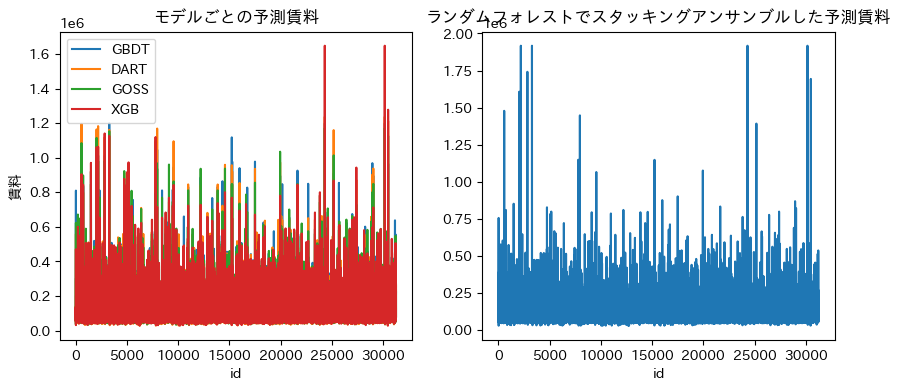

In [52]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_GBDT, label='GBDT')
ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')
ax.set_xlabel("id")
ax.set_ylabel('賃料')
ax.set_title('モデルごとの予測賃料')

ax2.plot(range(len(blend_pred)), blend_pred)
ax2.set_xlabel('id')
ax2.set_title('ランダムフォレストでスタッキングアンサンブルした予測賃料')

ax.legend(loc='best')
plt.show()

In [14]:
predicts = pd.concat([pred_LGBM,pred_DART,pred_GOSS,pred_XGB],axis=1)
predicts.corr()

,0,0,0,0
0,1.00000,0.991690,0.989630,0.970660
0,0.99169,1.000000,0.986725,0.968464
0,0.98963,0.986725,1.000000,0.976114
0,0.97066,0.968464,0.976114,1.000000
